In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data

In [3]:
# Cell 2: Load the data
df = load_data("raw_analyst_ratings.csv")  # Update the path if your file is in a different folder, e.g. "data/raw_analyst_ratings.csv"
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
# Calculate headline length statistics
df['headline_length'] = df['headline'].str.len()
headline_stats = df['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [7]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


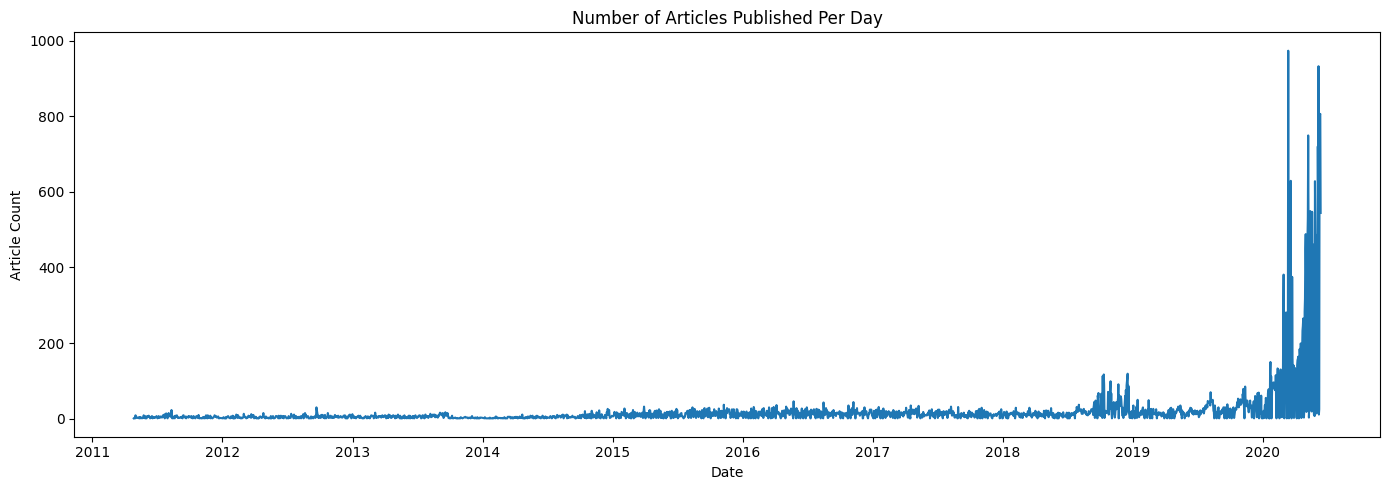

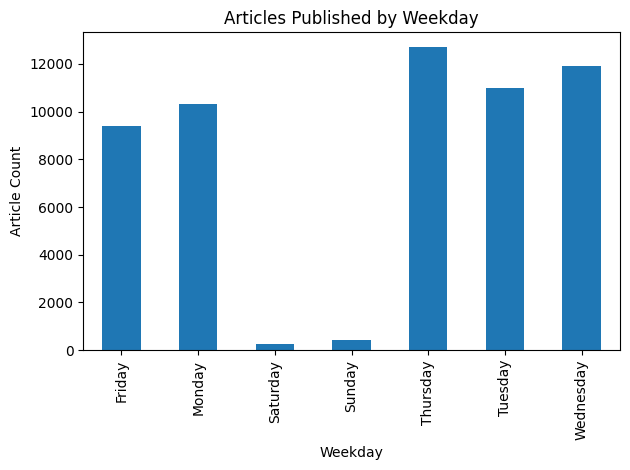

In [ ]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date (without time) and weekday
df['date_only'] = df['date'].dt.date
df['weekday'] = df['date'].dt.day_name()

# Count articles per day
articles_per_day = df.groupby('date_only').size()

# Plot articles per day (trend over time)


plt.figure(figsize=(14, 5))
articles_per_day.plot()
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.tight_layout()
plt.show()

# Analyze articles by weekday
weekday_counts = df['weekday'].value_counts().sort_index()
weekday_counts.plot(kind='bar')
plt.title('Articles Published by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Article Count')
plt.tight_layout()
plt.show()

In [ ]:
# identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams, FreqDist

# Download NLTK resources if not already present
nltk.download('punkt', quiet=True, force=True)
nltk.download('punkt_tab', quiet=True, force=True)
nltk.download('stopwords', quiet=True, force=True)

# Combine all headlines into a single text
all_headlines = ' '.join(df['headline'].dropna().astype(str))

# Tokenize and clean
tokens = word_tokenize(all_headlines.lower())
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get most common keywords (unigrams)
fdist = FreqDist(tokens)
print("Most common keywords:")
print(fdist.most_common(20))

# Get most common bigrams (phrases)
bigrams = ngrams(tokens, 2)
bigram_fdist = FreqDist(bigrams)
print("\nMost common bigrams (phrases):")
for phrase, count in bigram_fdist.most_common(20):
    print(' '.join(phrase), ":", count)

Most common keywords:
[('stocks', 161702), ('vs', 138833), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688), ('update', 91645), ('market', 91080), ('earnings', 87183), ('sales', 79528), ('top', 78493), ('benzinga', 74466), ('pt', 73059), ('announces', 66531), ('price', 64217), ('buy', 63927), ('downgrades', 61942), ('trading', 61146), ('raises', 57793), ('upgrades', 56802)]

Most common bigrams (phrases):
vs est : 98090
eps vs : 58657
reports eps : 51654
price target : 47264
benzinga top : 44259
stocks moving : 40038
market update : 33159
earnings scheduled : 32054
sales vs : 29280
initiates coverage : 28981
raises pt : 27266
shares several : 24078
companies trading : 23159
trading higher : 22935
adj eps : 21708
top upgrades : 21111
trading lower : 20096
stocks hit : 20016
option alert : 18226
biggest movers : 17806


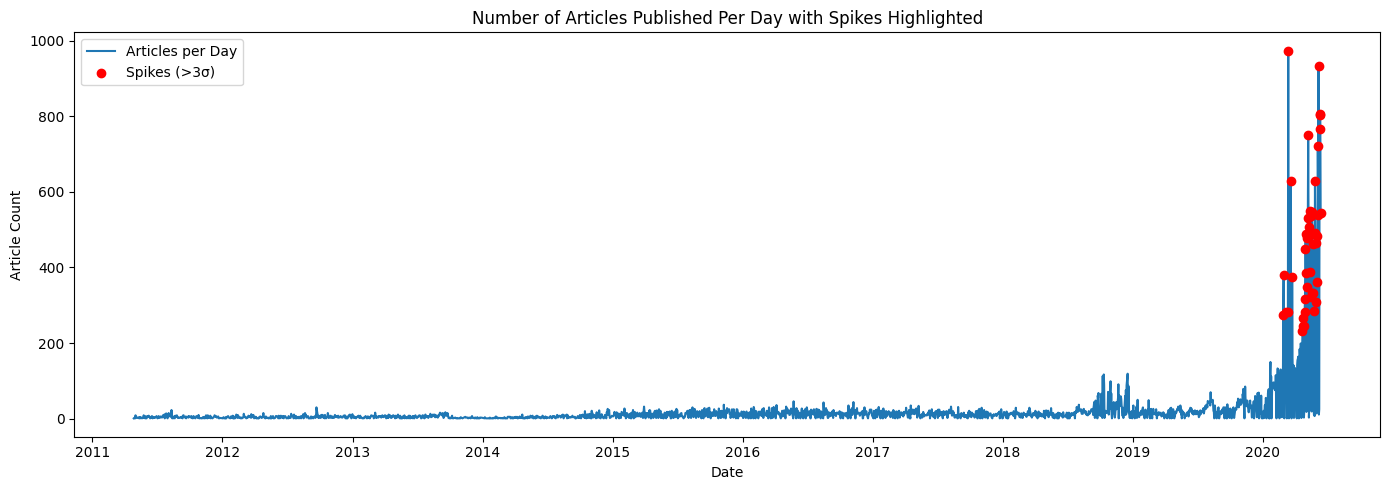

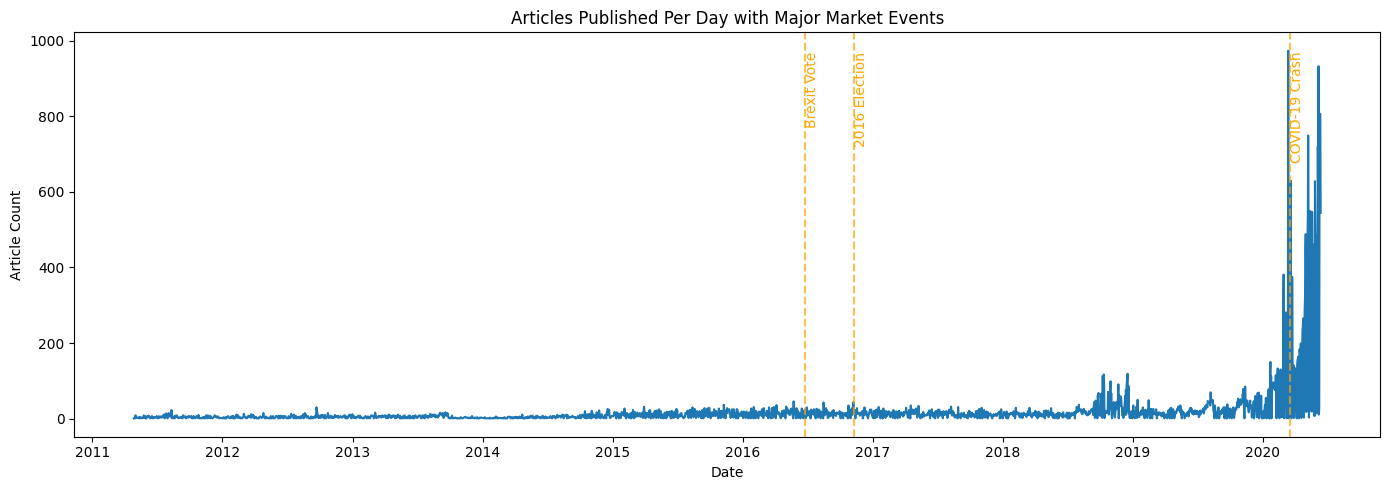

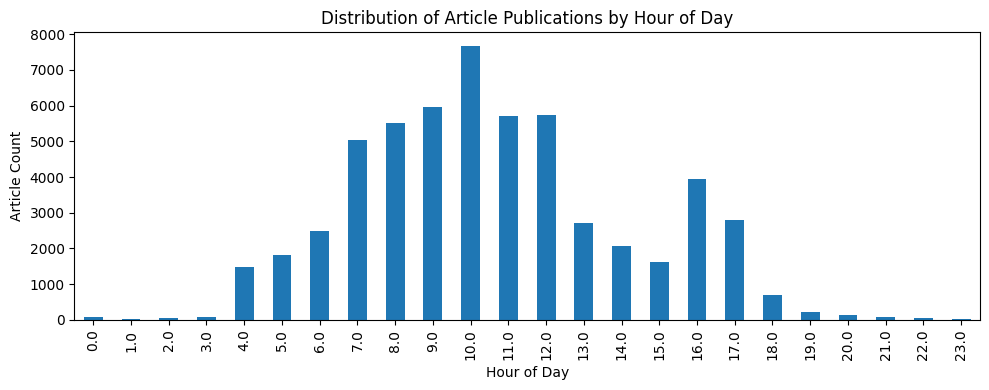

In [ ]:

# Time Series Analysis: Publication Frequency Over Time

# Plot publication frequency (already done in previous cells for articles_per_day)
# Let's enhance the analysis by:
# 1. Highlighting spikes (outliers) in publication frequency
# 2. Annotating known market events (example: COVID-19 crash, etc.)
# 3. Analyzing publishing times (hour of day) if time data is available


# 1. Highlight spikes in publication frequency
mean_count = articles_per_day.mean()
std_count = articles_per_day.std()
spike_threshold = mean_count + 3 * std_count
spikes = articles_per_day[articles_per_day > spike_threshold]

plt.figure(figsize=(14, 5))
articles_per_day.plot(label='Articles per Day')
plt.scatter(spikes.index, spikes.values, color='red', label='Spikes (>3σ)', zorder=5)
plt.title('Number of Articles Published Per Day with Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Annotate known market events (example: COVID-19 crash)
# You can add more events as needed
event_dates = {
    'COVID-19 Crash': '2020-03-16',
    '2016 Election': '2016-11-08',
    'Brexit Vote': '2016-06-23'
}
plt.figure(figsize=(14, 5))
articles_per_day.plot(label='Articles per Day')
for event, date in event_dates.items():
    if date in articles_per_day.index.astype(str):
        plt.axvline(date, color='orange', linestyle='--', alpha=0.7)
        plt.text(date, plt.ylim()[1]*0.95, event, rotation=90, verticalalignment='top', color='orange')
plt.title('Articles Published Per Day with Major Market Events')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.tight_layout()
plt.show()

# 3. Analyze publishing times (hour of day)
if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
    df['hour'] = df['date'].dt.hour
    hour_counts = df['hour'].value_counts().sort_index()
    plt.figure(figsize=(10, 4))
    hour_counts.plot(kind='bar')
    plt.title('Distribution of Article Publications by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Article Count')
    plt.tight_layout()
    plt.show()
else:
    print("No time information available in 'date' column for hourly analysis.")

# Summary:
# - Spikes in publication frequency are highlighted.
# - Major market events are annotated.
# - Publishing time distribution is shown if time data is available.

In [17]:
import re

# Publisher Analysis

# 1. Top publishers by article count
top_publishers = publisher_counts.head(20)
print("Top 20 publishers by article count:")
print(top_publishers)

# 2. Analyze type of news reported by top publishers
# For simplicity, let's look at the most common keywords in headlines for each top publisher
for publisher in top_publishers.index:
    headlines_subset = df[df['publisher'] == publisher]['headline'].dropna().astype(str)
    tokens_subset = [word for headline in headlines_subset for word in word_tokenize(headline.lower()) if word.isalpha() and word not in stop_words]
    fdist_subset = FreqDist(tokens_subset)
    print(f"\nMost common keywords for publisher '{publisher}':")
    print(fdist_subset.most_common(10))

# 3. Identify publisher names that look like email addresses and extract domains

# Regex for email addresses
email_pattern = re.compile(r'[\w\.-]+@[\w\.-]+\.\w+')
email_publishers = df['publisher'].dropna().unique()
email_publishers = [p for p in email_publishers if email_pattern.fullmatch(p)]

# Extract domains
domains = [p.split('@')[-1] for p in email_publishers]
domain_counts = pd.Series(domains).value_counts()
print("\nTop email domains among publishers:")
print(domain_counts.head(10))

Top 20 publishers by article count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

Most common keywords for publisher 'Paul Quintaro':
[('vs', 75010), ('est', 69697), ('eps', 57004), ('reports', 55265), ('sales', 31407), ('shares', 22798), ('sees', 20730), ('announces', 20374), ('pt', 15393), ('revenue', 14690)]

Most common keywords for publisher 'Lisa Levin':
[('stocks', 68373), ('moving', 32324), ('session', 32324), ('top', 31267), ('market', 